# Pima印第安人数据集上的机器学习-分类算法（根据诊断措施预测糖尿病的发病）

2018年04月02日 16:49:37 易悠 阅读数：2243
版权声明：本文为博主原创文章，未经博主允许不得转载。
https://blog.csdn.net/yizheyouye/article/details/79791473
## 数据集简介
该数据集最初来自国家糖尿病/消化/肾脏疾病研究所。数据集的目标是基于数据集中包含的某些诊断测量来诊断性的预测 患者是否患有糖尿病。
从较大的数据库中选择这些实例有几个约束条件。尤其是，这里的所有患者都是Pima印第安至少21岁的女性。
数据集由多个医学预测变量和一个目标变量组成Outcome。预测变量包括患者的怀孕次数、BMI、胰岛素水平、年龄等。

## 1 加载库

In [3]:
import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

import pandas as pd # 数据科学计算工具
import numpy as np # 数值计算工具
import matplotlib.pyplot as plt # 可视化
import seaborn as sns # matplotlib的高级API
%matplotlib inline 
# 在Notebook里面作图/嵌图
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

## 2 数据
【1】Pregnancies：怀孕次数 
【2】Glucose：葡萄糖 
【3】BloodPressure：血压 (mm Hg) 
【4】SkinThickness：皮层厚度 (mm) 
【5】Insulin：胰岛素 2小时血清胰岛素（mu U / ml 
【6】BMI：体重指数 （体重/身高）^2 
【7】DiabetesPedigreeFunction：糖尿病谱系功能 
【8】Age：年龄 （岁） 
【9】Outcome：类标变量 （0或1）


In [19]:
pima = pd.read_csv("diabetes.csv",names=['Pregnancies','Glucose','BloodPres','SkinThic','Insulin','BMI,','DiabetesPed','Age','Outcome']) 
pima.head() # 头
# panda.head()/panda.tail() 尾。查看Series或者DataFrame对象的小样本；
# 显示的默认元素数量的前五个（默认5），当然我们可以传递一个自定义数字

,Pregnancies,Glucose,BloodPres,SkinThic,Insulin,"BMI,",DiabetesPed,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
pima.shape
# panda的shape形状属性，给出对象的尺寸（行数目，列数目）

(768, 9)

In [9]:
pima.describe()
# panda的describe描述属性，展示了每一个字段的
#【count条目统计，mean平均值，std标准值，min最小值，
# 25%，50%中位数，75%，max最大值】

,Preg,Glu,BloodPres,SkinThic,Insulin,"BMI,",DiabetesPed,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
pima.groupby("Outcome").size()
# 按照是否发病对数据集分组，并展示每一组的大小和数量。

Outcome
0    500
1    268
dtype: int64

## Data Visualization - 数据可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B0010B8>,
      dtype=object)

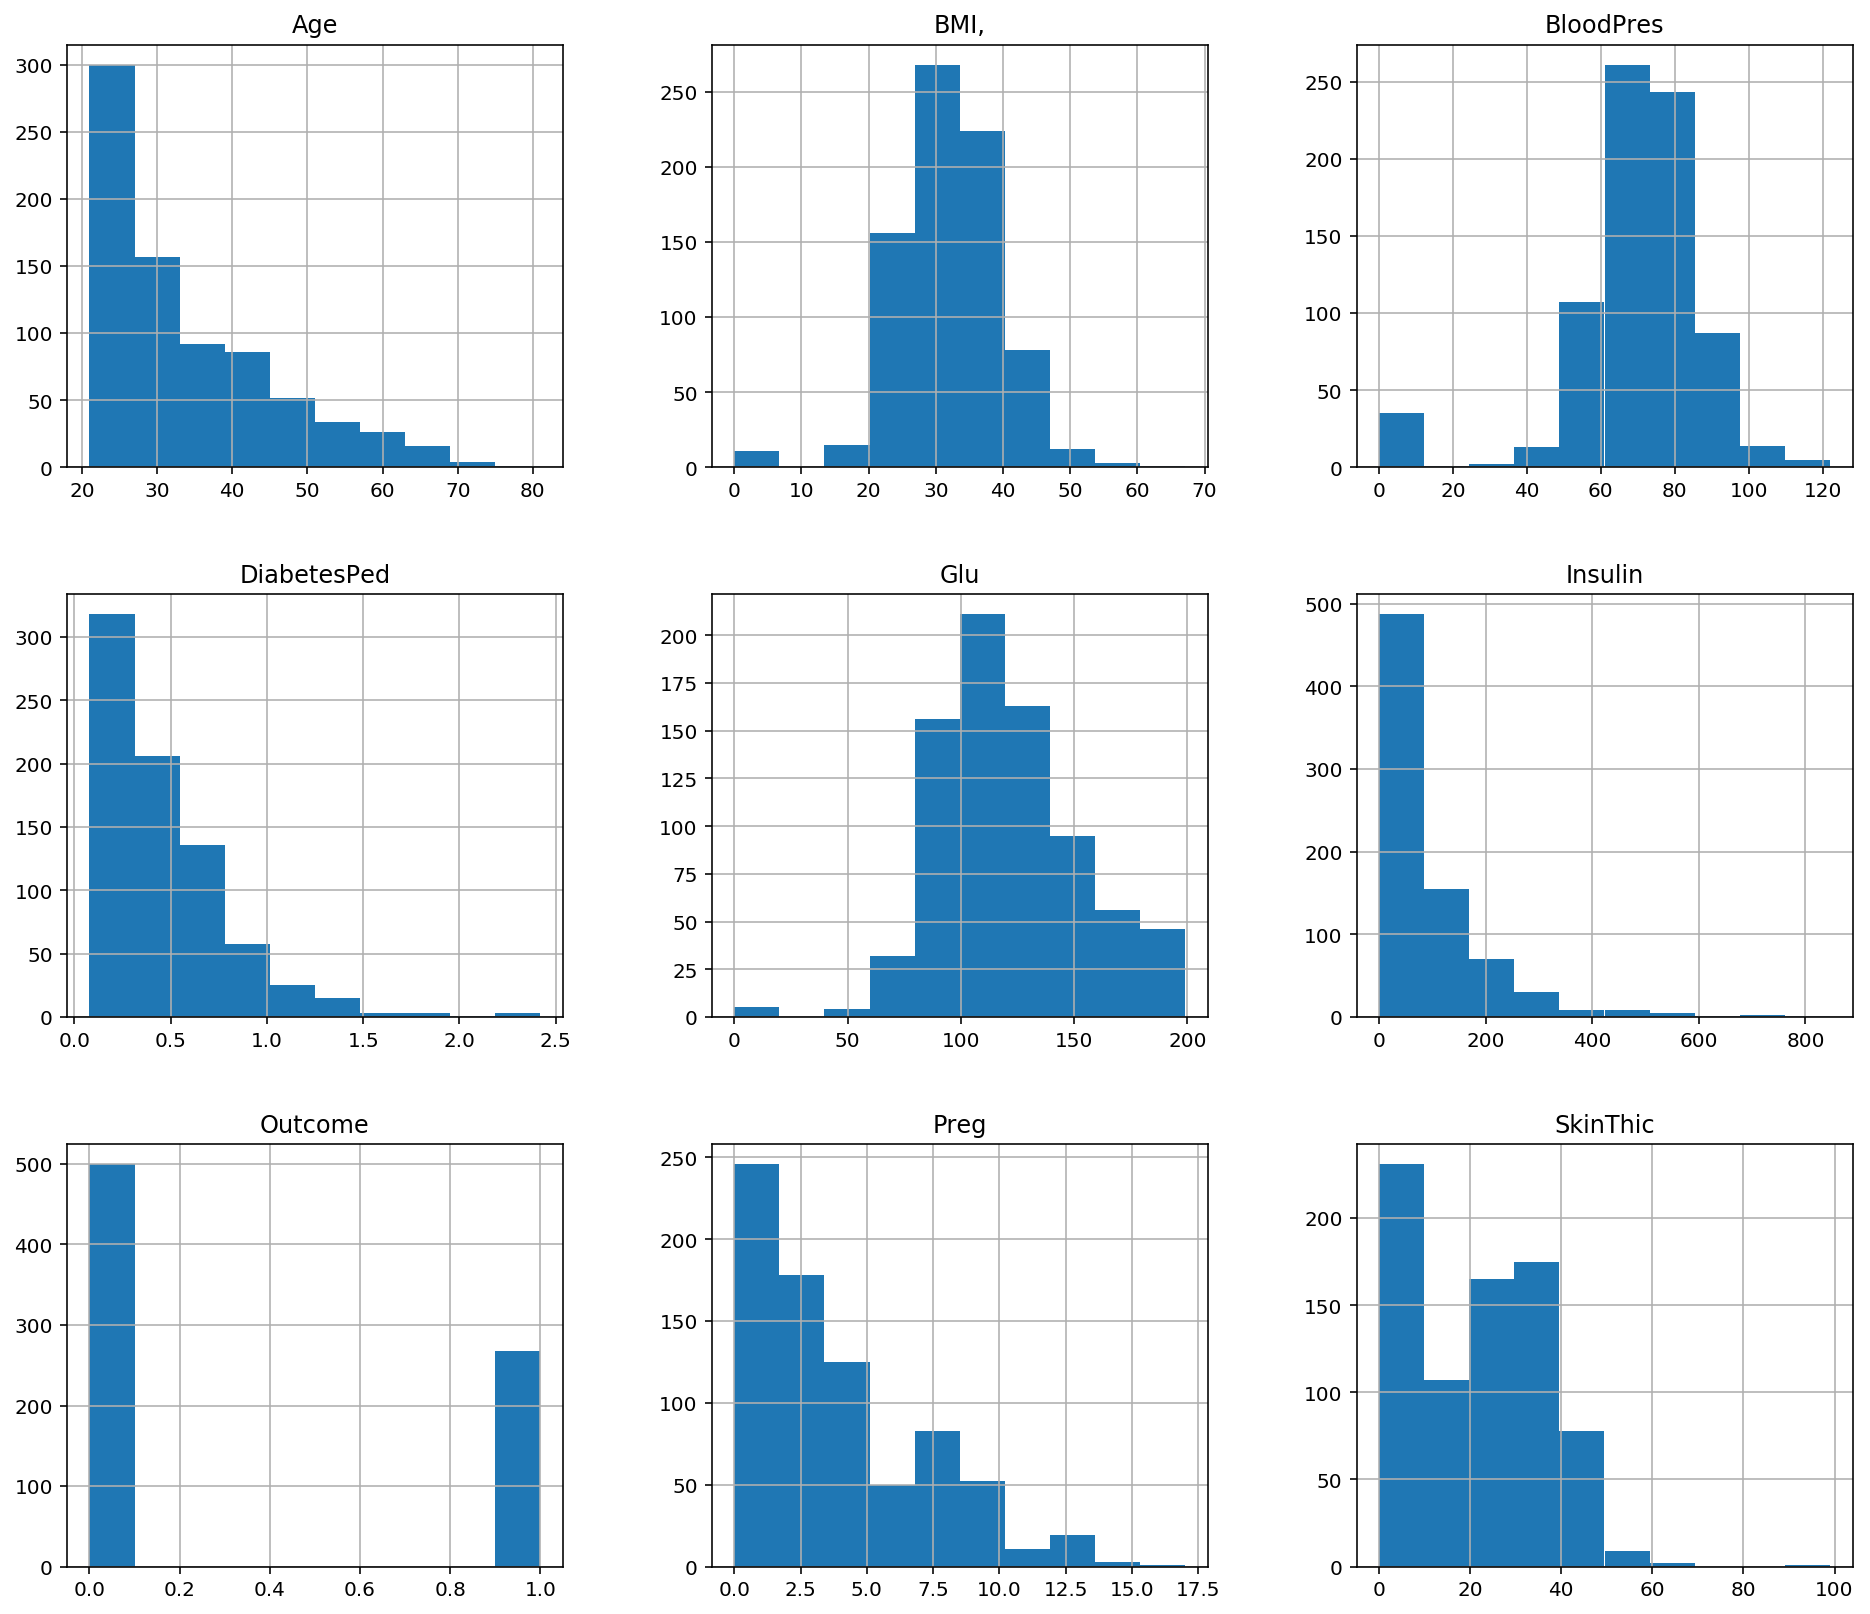

In [11]:
#查看每个字段的数据分布；figsize的参数显示的是每个子图的长和宽
pima.hist(figsize=(16,14)) 

In [12]:
# 各列的偏移度——Jason Brownlee. 正数图像向左。
skew = pima.skew()
print(skew)

Preg           0.901674
Glu            0.173754
BloodPres     -1.843608
SkinThic       0.109372
Insulin        2.272251
BMI,          -0.428982
DiabetesPed    1.919911
Age            1.129597
Outcome        0.635017
dtype: float64


## seaborn常用命令
#【1】set_style()是用来设置主题的，Seaborn有5个预设好的主题：darkgrid、whitegrid、dark、white、ticks，默认为darkgrid
#【2】set()通过设置参数可以用来设置背景，调色板等，更加常用
#【3】displot()为hist加强版
#【4】kdeplot()为密度曲线图
#【5】boxplot()为箱图
#【6】joinplot()联合分布图
#【7】heatmap()热点图
#【8】pairplot()多变量图，可以支持各种类型的变量分析，是特征分析很好用的工具
sns.pairplot(pima, hue = "Outcome")

Preg              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glu            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPres      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThic          AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI,           AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPed          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age               AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome           AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

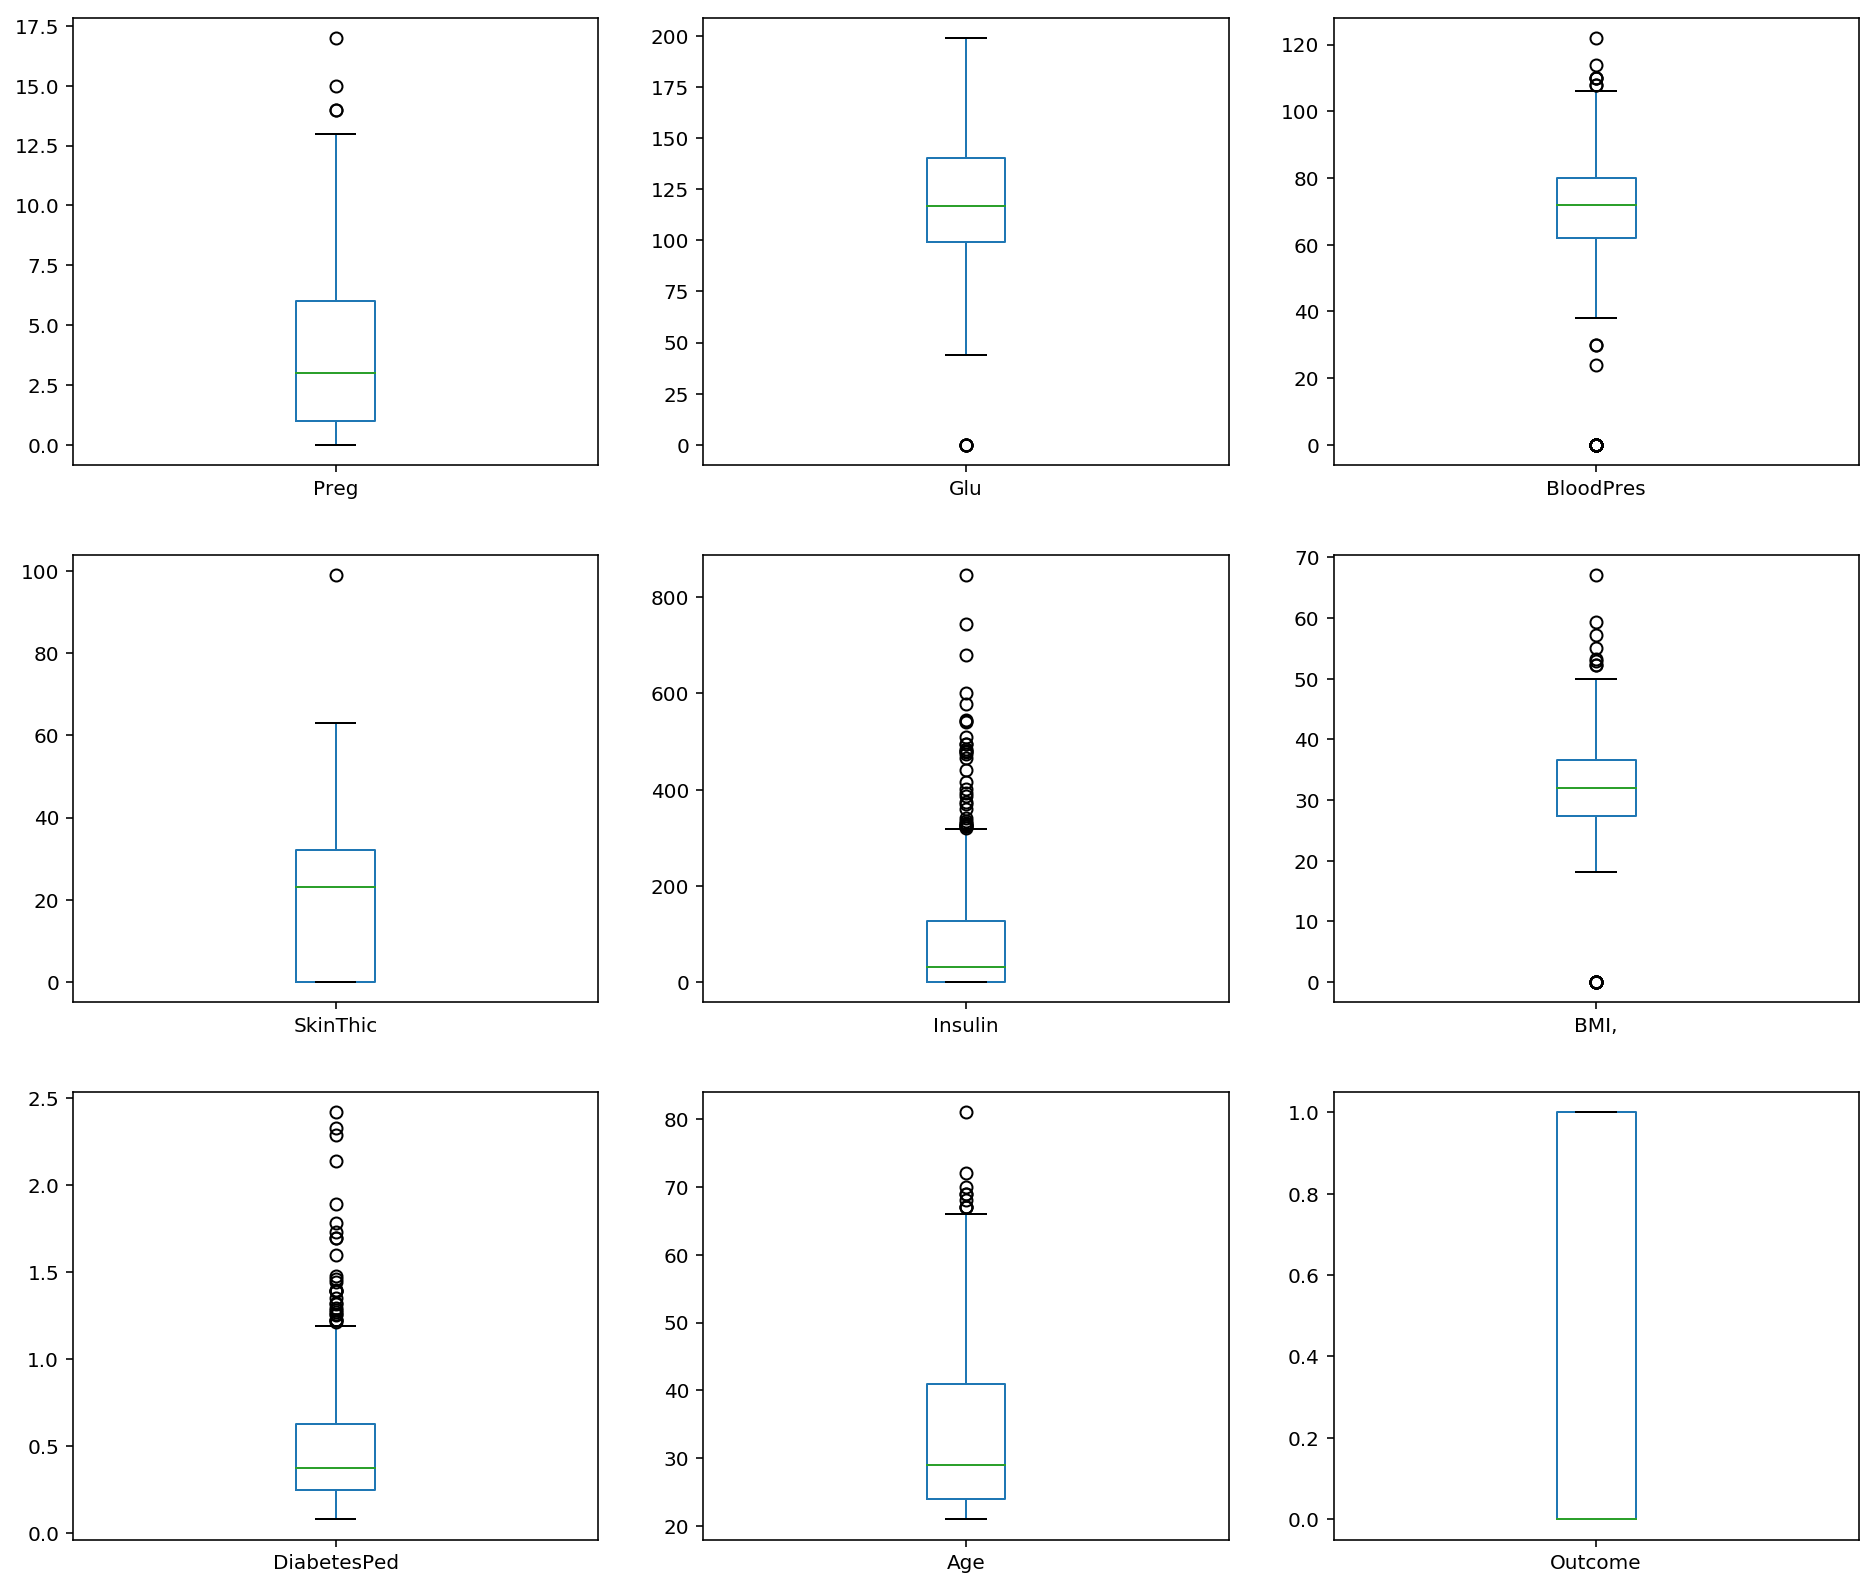

In [14]:
#pandas.plot作图：数据分为Series 和 DataFrame两种类型；现释义数据为DataFrame的参数

#【0】data:DataFrame
#【1】x:label or position,default None 指数据框列的标签或位置参数
#【2】y:label or position,default None 指数据框列的标签或位置参数
#【3】kind:str（line折线图、bar条形图、barh横向条形图、hist柱状图、
#               box箱线图、kde Kernel的密度估计图，主要对柱状图添加Kernel概率密度线、
#               density same as “kde”、area区域图、pie饼图、scatter散点图、hexbin）
#【4】subplots:boolean，default False，为每一列单独画一个子图
#【5】sharex:boolean，default True if ax is None else False
#【6】sharey:boolean,default False
#【7】loglog:boolean,default False,x轴/y轴同时使用log刻度
pima.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False, figsize=(16,14))


In [15]:
column_x = pima.columns[0:len(pima.columns) - 1] # 选择特征列，去掉目标列
column_x # 显示所有特征列信息

Index(['Preg', 'Glu', 'BloodPres', 'SkinThic', 'Insulin', 'BMI,',
       'DiabetesPed', 'Age'],
      dtype='object')

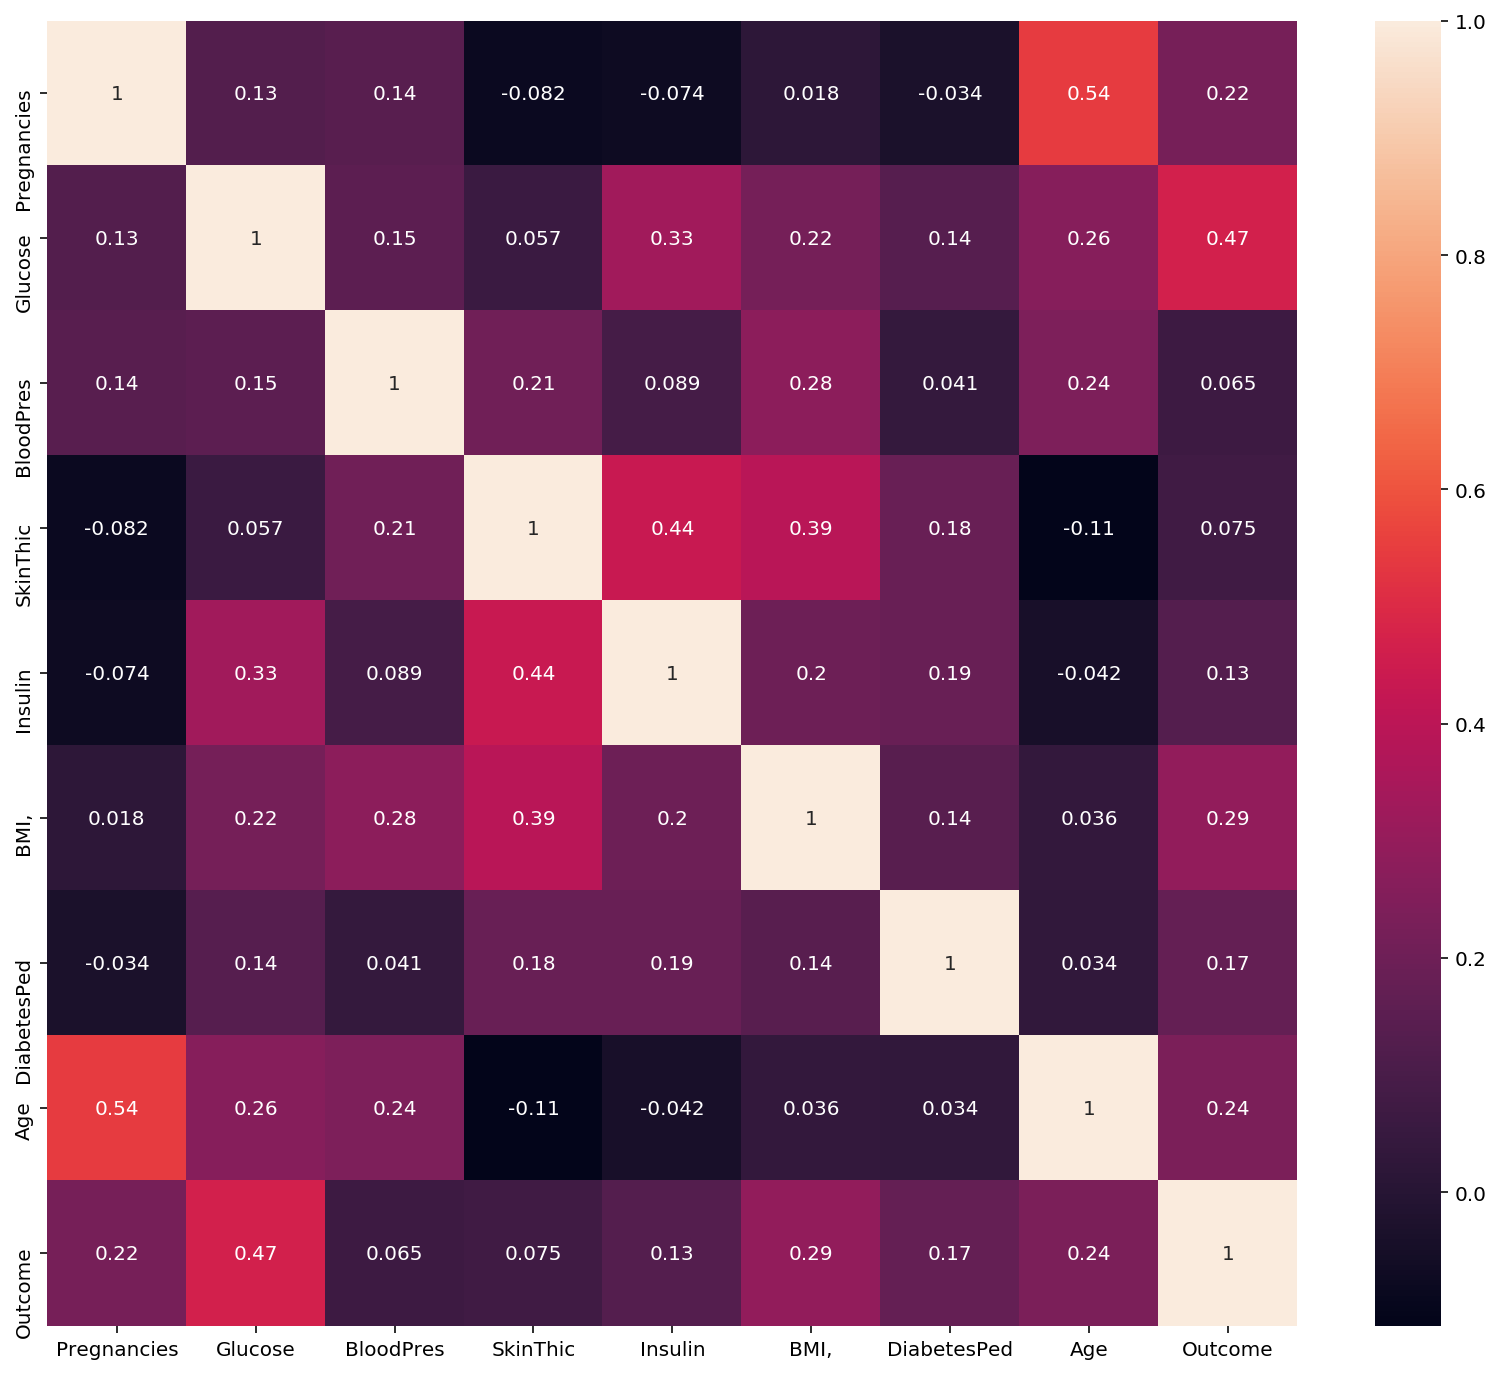

In [19]:
corr = pima[pima.columns].corr() # 计算变量的相关系数，得到一个N * N的矩阵
plt.subplots(figsize=(14,12)) # 可以先试用plt设置画布的大小，然后在作图，修改
sns.heatmap(corr, annot = True) # 使用热度图可视化这个相关系数矩阵


# 4 Feature Extraction 特征提取

In [20]:
# 导入和特征选择相关的包
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X = pima.iloc[:, 0:8] # 特征列 0-7列，不含第8列
Y = pima.iloc[:, 8] # 目标列为第8列

select_top_4 = SelectKBest(score_func=chi2, k =4) # 通过卡方检验选择4个得分最高的特征

# SelectKBest() 只保留K个最高分的特征
# SelectPercentile() 只保留用户指定百分比的最高得分的特征
# 使用常见的单变量统计检验：假正率SelectFpr，错误发现率SelectFdr，或者总体错误率SelectFwe
# GenericUnivariateSelect通过结构化策略进行特征选择，通过超参数搜索估计器进行特征选择

# SelectKBest()和SelectPercentile()能够返回特征评价的得分和P值
#
# sklearn.feature_selection.SelectPercentile(score_func=<function f_classif>, percentile=10) 
# sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, k=10)

# 其中的参数score_func有以下选项：

#【1】回归：f_regression:相关系数，计算每个变量与目标变量的相关系数，然后计算出F值和P值
#          mutual_info_regression:互信息，互信息度量X和Y共享的信息：
#         它度量知道这两个变量其中一个，对另一个不确定度减少的程度。
#【2】分类：chi2：卡方检验
#          f_classif:方差分析，计算方差分析（ANOVA）的F值（组间均方/组内均方）；
#          mutual_info_classif:互信息，互信息方法可以捕捉任何一种统计依赖，但是作为非参数方法，
#                              需要更多的样本进行准确的估计。

fit = select_top_4.fit(X, Y) # 获取特征信息和目标值信息
features = fit.transform(X) # 特征转换 (后的数据框),只有4列
features.shape # out: (768, 4)
features[0:5] #新特征列,前5行4列，显示成5X4的矩阵？

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       [ 89. ,  94. ,  28.1,  21. ],
       [137. , 168. ,  43.1,  33. ]])

In [42]:
pima.head() 显示5行记录
# 因此，表现最佳的特征是：Glucose-葡萄糖、Insulin-胰岛素、BMI指数、Age-年龄
# 结果是由相关系数，卡方检验选择4个得分最高的特征得到的。
# 没有直接显示出来列名？
# pima.tail() # 显示5行记录

,Pregnancies,Glucose,BloodPres,SkinThic,Insulin,"BMI,",DiabetesPed,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X_features = pd.DataFrame(data = features, columns=["Glucose","Insulin","BMI","Age"]) 
# 构造新特征DataFrame
X_features.head() # 显示4列前5行。

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


# 5 Standardization - 标准化
## 它将属性值更改为 均值为0，标准差为1 的 高斯分布. 
## 当算法期望输入特征处于高斯分布时，它非常有用

In [7]:
from sklearn.preprocessing import StandardScaler

rescaledX = StandardScaler().fit_transform(X_features) 
# 通过sklearn的preprocessing数据预处理中StandardScaler特征缩放 标准化特征信息

X = pd.DataFrame(data = rescaledX, columns = X_features.columns) 
# 构建新特征DataFrame

X.head()

,Glucose,Insulin,BMI,Age
0,0.848324,-0.692891,0.204013,1.425995
1,-1.123396,-0.692891,-0.684422,-0.190672
2,1.943724,-0.692891,-1.103255,-0.105584
3,-0.998208,0.123302,-0.494043,-1.041549
4,0.504055,0.765836,1.409746,-0.020496


# 6 机器学习 - 构建二分类算法模型

In [8]:
from sklearn.model_selection import train_test_split

# 切分数据集为：特征训练集、特征测试集、目标训练集、目标测试集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 22, test_size = 0.2)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = []
models.append(("LR", LogisticRegression())) # 逻辑回归
models.append(("NB", GaussianNB())) # 高斯朴素贝叶斯
models.append(("KNN", KNeighborsClassifier())) # K近邻分类
models.append(("DT", DecisionTreeClassifier())) # 决策树分类
models.append(("SVM", SVC())) # 支持向量机分类

results = []
names = []
for name, model in models:
    kflod = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model, X_train,Y_train, cv = kflod,scoring="accuracy")
    names.append(name)
    results.append(cv_result)

for i in range(len(names)):
    print(names[i], results[i].mean)


LR <built-in method mean of numpy.ndarray object at 0x000000000B1B7B70>
NB <built-in method mean of numpy.ndarray object at 0x000000000B1B7F30>
KNN <built-in method mean of numpy.ndarray object at 0x000000000B626AD0>
DT <built-in method mean of numpy.ndarray object at 0x000000000B626BC0>
SVM <built-in method mean of numpy.ndarray object at 0x000000000B1B7DF0>


## 基于PCA和网格搜索SVM参数

Text(0,0.5,'Second principal component')

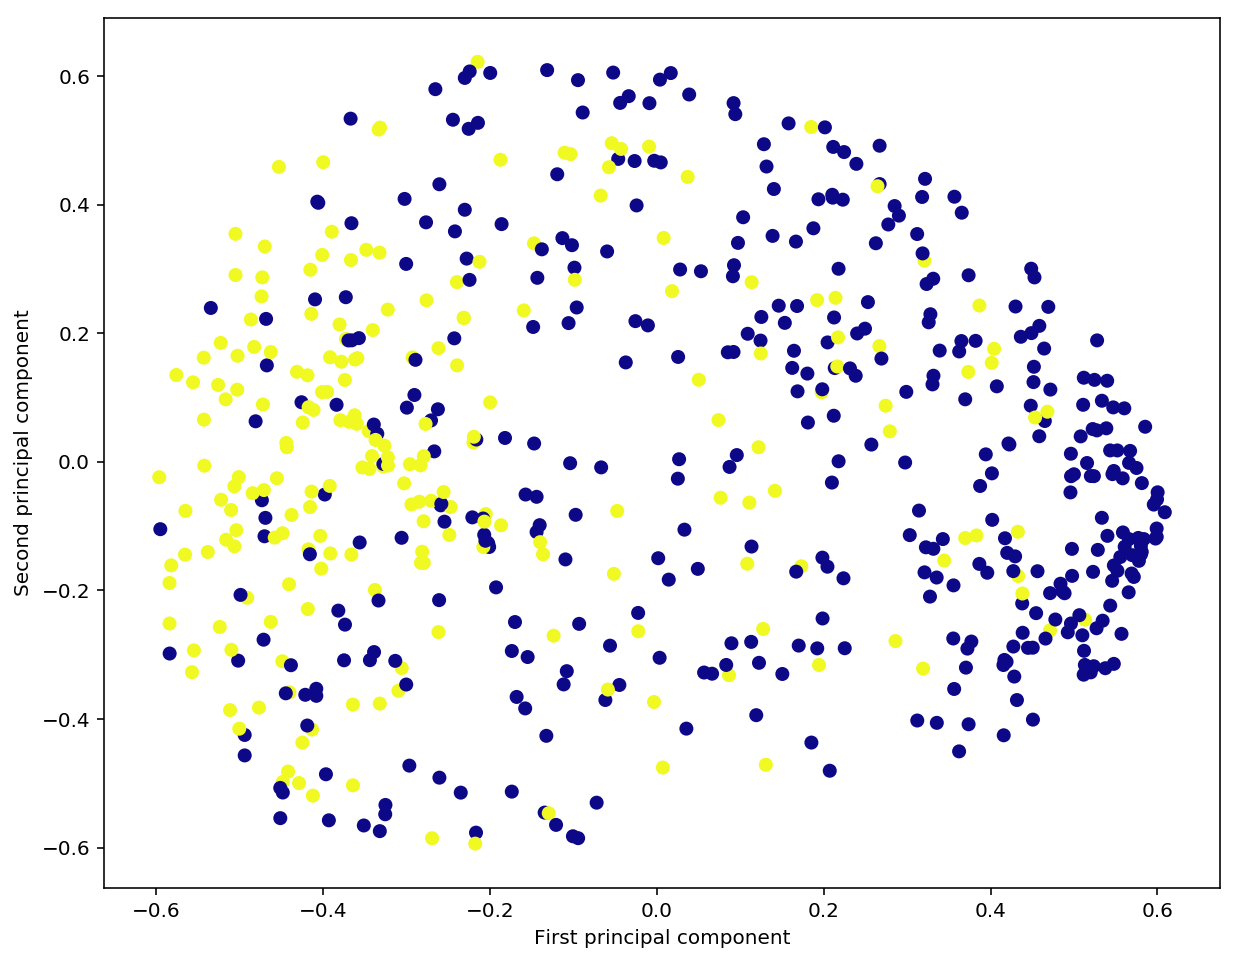

In [9]:
# 【1】 Applying Kernel PCA

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_pca = kpca.fit_transform(X_train)
X_test_pca = kpca.transform(X_test)

plt.figure(figsize=(10,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=Y_train,cmap='plasma')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


In [10]:
# 【2】SVC

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_pca, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
# 使用SVC预测生存

y_pred = classifier.predict(X_test_pca)
cm = confusion_matrix(Y_test, y_pred)
cm # out: array([[86, 14],
      #                  [30, 24]], dtype=int64)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.86      0.80       100
          1       0.63      0.44      0.52        54

avg / total       0.70      0.71      0.70       154



In [15]:
# 使用 网格搜索 来提高模型

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose = 2)
grid.fit(X_train_pca, Y_train)

# 预测
grid_predictions = grid.predict(X_test_pca)

# 分类报告
print(classification_report(Y_test,grid_predictions))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


# 7 可视化结果

[Text(0,0,'LR'),
 Text(0,0,'NB'),
 Text(0,0,'KNN'),
 Text(0,0,'DT'),
 Text(0,0,'SVM')]

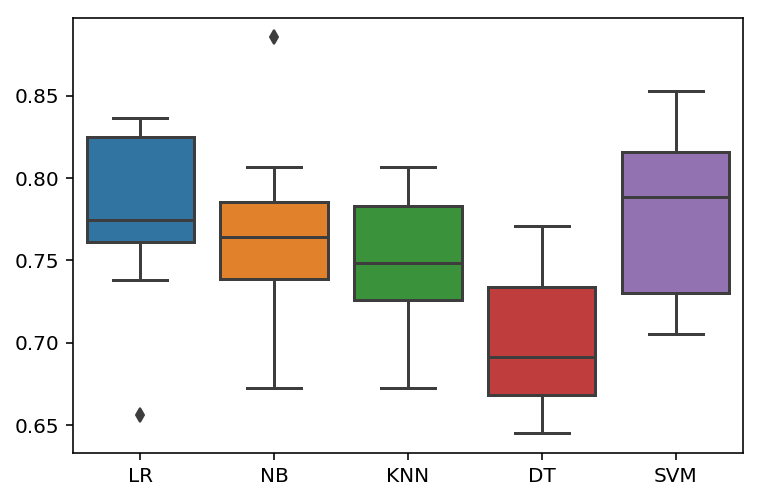

In [16]:
ax = sns.boxplot(data = results)
ax.set_xticklabels(names)

# 8 使用测试数据预测

0.7142857142857143
             precision    recall  f1-score   support

          0       0.73      0.88      0.80       100
          1       0.65      0.41      0.50        54

avg / total       0.70      0.71      0.69       154



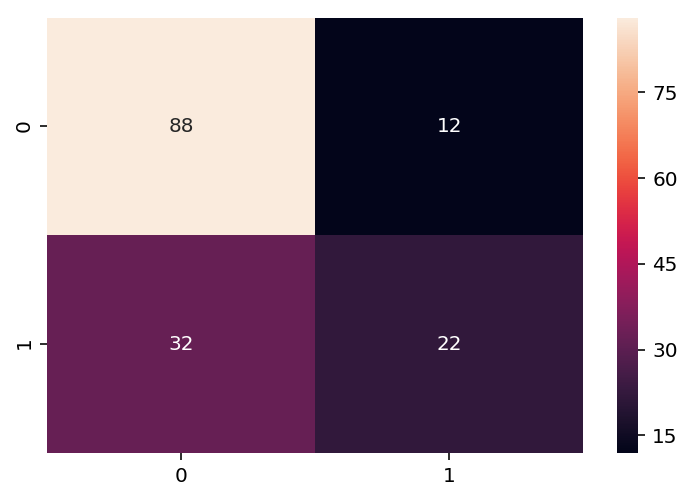

In [17]:
# 使用逻辑回归预测 

lr = LogisticRegression() # LR模型构建
lr.fit(X_train, Y_train) # 
predictions = lr.predict(X_test) # 使用测试值预测

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(accuracy_score(Y_test, predictions)) # 打印评估指标（分类准确率）

print(classification_report(Y_test,predictions)) 

conf = confusion_matrix(Y_test, predictions) # 混淆矩阵

label = ["0","1"] # 
sns.heatmap(conf, annot = True, xticklabels=label, yticklabels=label)


# Is over !